In [1]:
# Import of necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# task 1: load in the spotify dataset
spotify_data = pd.read_csv('spotify_data.csv')

In [3]:
# task 2: preview the dataset
spotify_data.head(10)

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910
5,144.915,0.721,0.568,0.212000,0.1280,0.1090
6,130.826,0.718,0.668,0.007800,0.1240,0.0380
7,138.049,0.694,0.711,0.000000,0.1120,0.2830
8,219.960,0.774,0.751,0.000000,0.0728,0.1890
9,199.942,0.893,0.907,0.031100,0.5580,0.3020


In [4]:
# task 3: create a variable called song_tempos that contains the tempo column data.
song_tempos = spotify_data.tempo

In [5]:
# task 4: create necessary functions choose_statistic() 
# ('allows us to choose a statistic we want to calculate for our sampling and population distributions'), \
# population_distribution() ('allows us to plot the population distribution of a dataframe with one function call'),
# and sampling_distribution() ('allows us to plot a simulated sampling distribution of a statistic')

def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)

  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


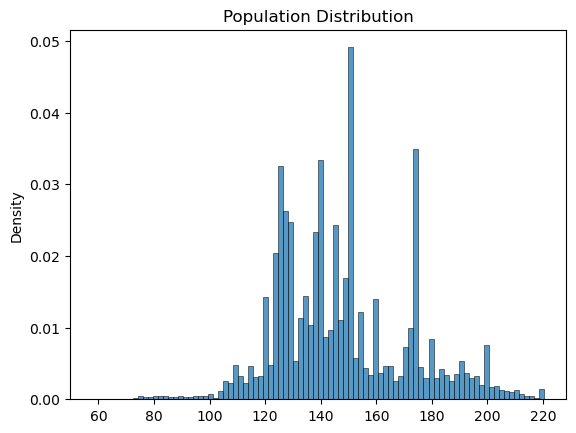

<Figure size 640x480 with 0 Axes>

In [6]:
# task 5: plot the population distribution with the mean labeled
population_distribution(song_tempos)

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


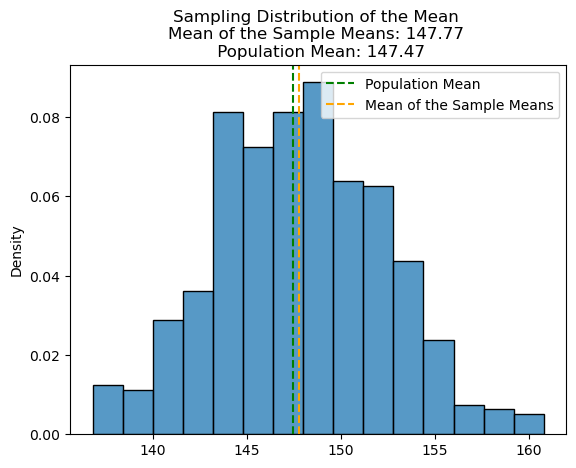

<Figure size 640x480 with 0 Axes>

In [7]:
# task 6: sampling distribution of the sample mean
sampling_distribution(song_tempos, 30, 'Mean')

In [ ]:
# task 7: Is the sample mean an unbiased or biased estimator of the population? Unbiased Estimator

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


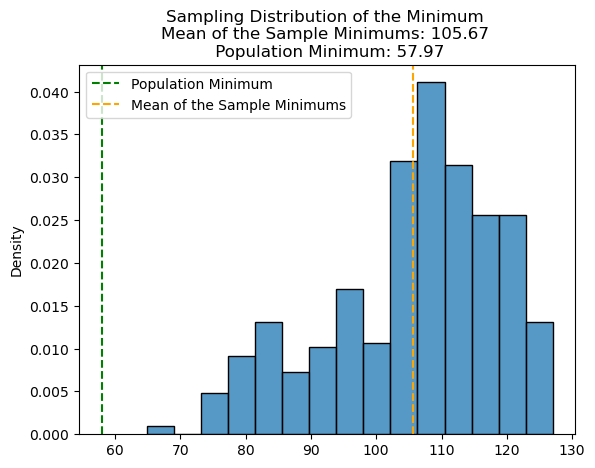

<Figure size 640x480 with 0 Axes>

In [8]:
# task 8: sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, 'Minimum')

In [ ]:
# task 9: Is the sample minimum an unbiased or biased estimator of the population? Biased Estimator

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


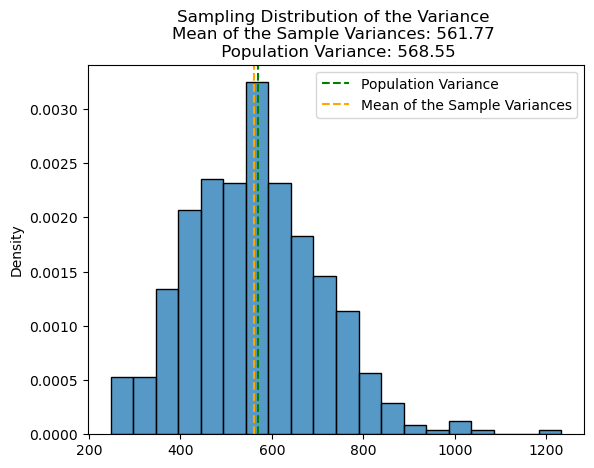

<Figure size 640x480 with 0 Axes>

In [9]:
# task 10: sampling distribution of the sample variance
sampling_distribution(song_tempos, 30, 'Variance')

In [ ]:
# task 11: Does the sample variance appear to be an unbiased or biased estimator of the population? Biased Estimator

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


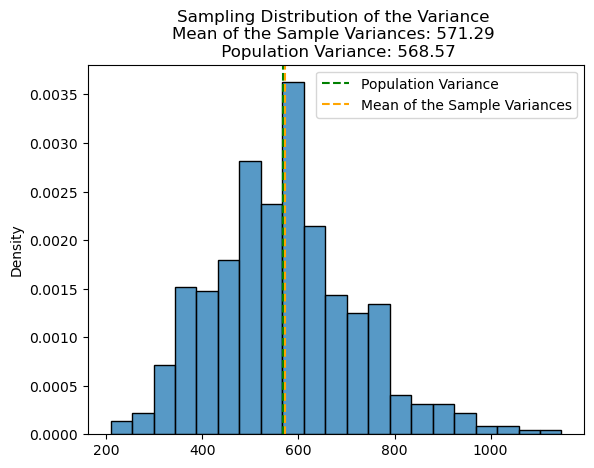

<Figure size 640x480 with 0 Axes>

In [10]:
# task 12: Change in the function for calculation of variance to np.var(x, ddof=1) 
# to avoid the underestimation of population variance
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')
    
sampling_distribution(song_tempos, 30, 'Variance')

In [11]:
# task 13: calculate the population mean and standard deviation
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)
print(population_mean, population_std)

147.4740559035575 23.8443414956797


In [12]:
# task 14: calculate the standard error of the sampling distribution of the sample mean with a sample size of 30
standard_error = population_std / (30**0.5)
print(round(standard_error,2))

4.35


In [13]:
# task 15: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs
tempo_cdf = stats.norm.cdf(140, population_mean, standard_error)
print(round(tempo_cdf, 3))

0.043


In [14]:
# task 16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
tempo_cdf_150 = 1 - stats.norm.cdf(150, population_mean, standard_error)
print(round(tempo_cdf_150, 3))

0.281


In [15]:
# EXTRA 1
# Add another sample statistic to the choose_statistic() function in helper_functions.py — such as median, mode, or maximum.
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  elif sample_stat_text == "Median":
    return np.median(x)
  elif sample_stat_text == "Mode":
    return stats.mode(x)
  elif sample_stat_text == "Maximum":
    return np.max(x)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", "Maximum", "Median", "Mode" or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", "Maximum", "Median", "Mode" or "Variance"')

In [16]:
choose_statistic(song_tempos, 'Median')

144.973

In [17]:
choose_statistic(song_tempos, 'Maximum')

220.29

In [18]:
choose_statistic(song_tempos, 'Mode')

ModeResult(mode=150.02, count=58)

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


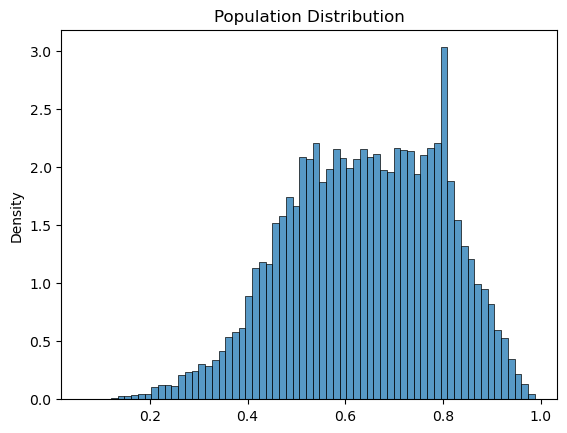

<Figure size 640x480 with 0 Axes>

In [19]:
# EXTRA 2
# Explore a different column of data from the spotify_data.csv dataset.
song_danceability = spotify_data.danceability
population_distribution(song_danceability)

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


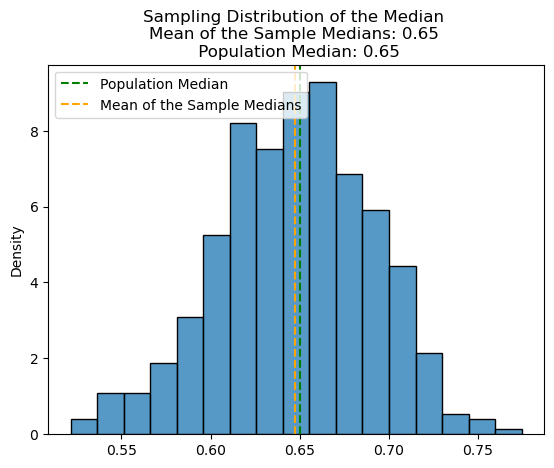

<Figure size 640x480 with 0 Axes>

In [20]:
sampling_distribution(song_danceability, 30, 'Median')

C:\ProgramData\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


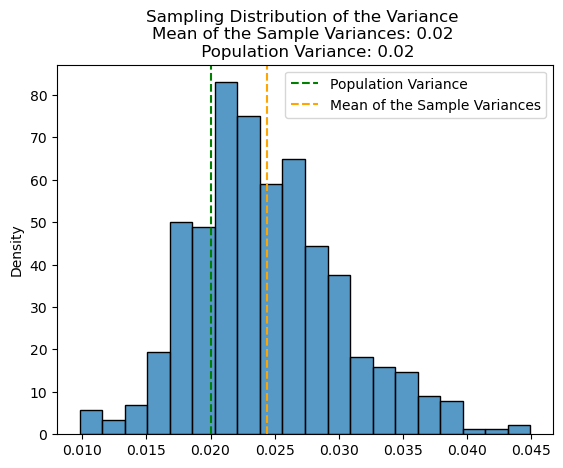

<Figure size 640x480 with 0 Axes>

In [21]:
sampling_distribution(song_danceability, 30, 'Variance')

In [22]:
population_mean = np.mean(song_danceability)
population_std = np.std(song_danceability)
print(population_mean, population_std)
standard_error = population_std / (30**0.5)
print(round(standard_error,2))

0.6393643210022456 0.15661527325794125
0.03


In [23]:
danceability_cdf = stats.norm.cdf(0.63, population_mean, standard_error)
print(round(danceability_cdf, 3))

0.372


In [26]:
danceability_cdf_65 = 1 - stats.norm.cdf(0.65, population_mean, standard_error)
print(round(danceability_cdf_65, 3))

0.355
